In [2]:
import tensorflow as tf
import os
import numpy as np

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imgdhr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            break
            #os.remove(image_path)

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 226 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
#Get another batch from the iterator
batch = data_iterator.next()

In [10]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [11]:
#Class 1 = Positive
#Class 0 = Negative
batch[1]

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

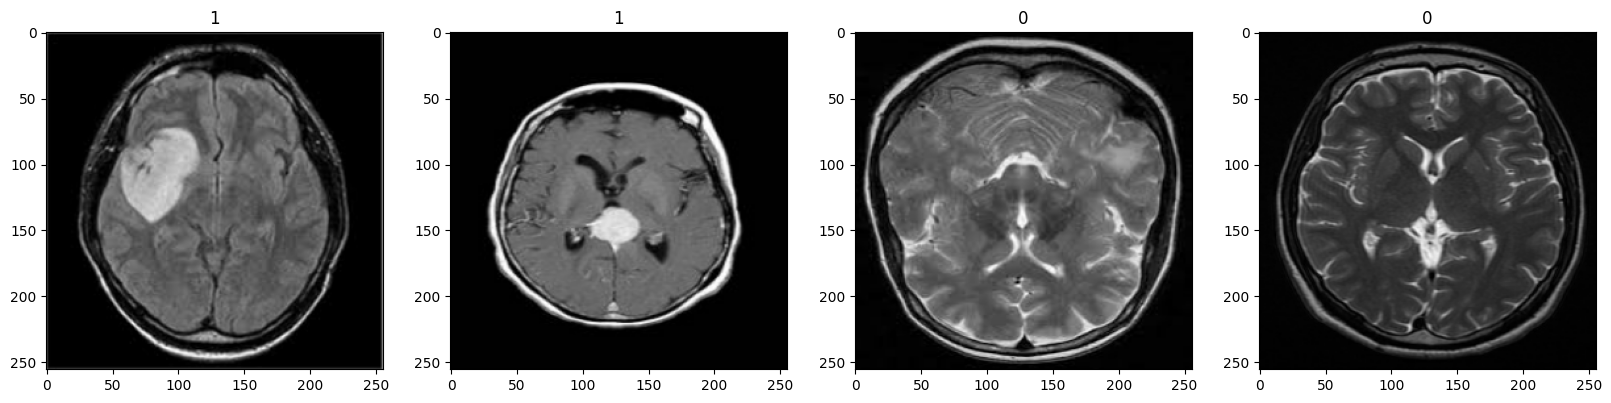

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
scaled = batch[0] / 255

In [14]:
scaled.max()

1.0

In [15]:
# Scale data
# x represents images, y represents target variable

data = data.map(lambda x,y: (x/255, y))

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [17]:
batch = scaled_iterator.next()

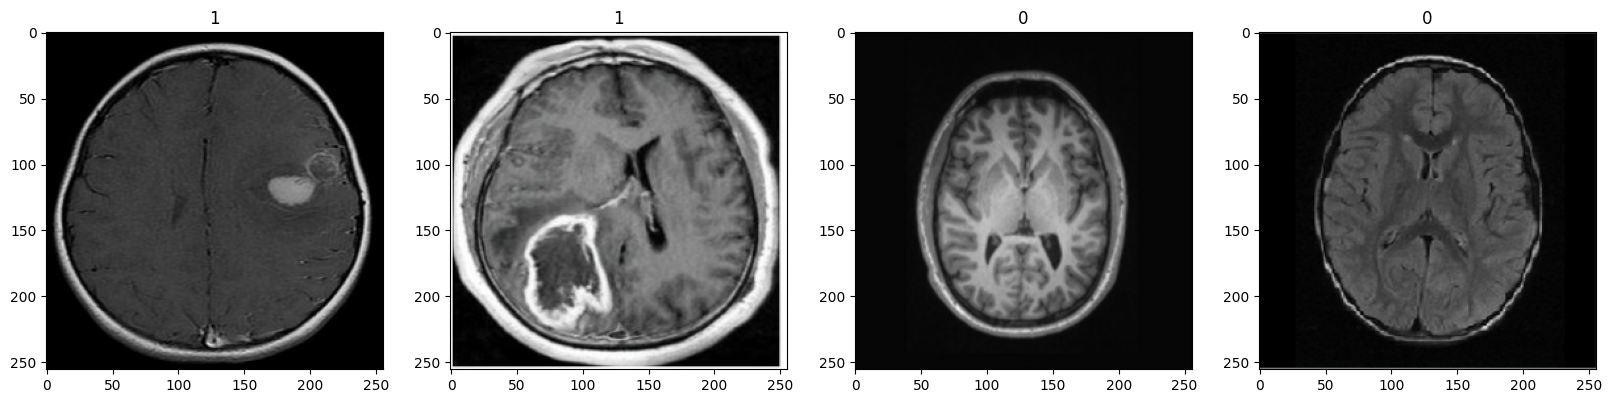

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [19]:
#num of batches
len(data)

8

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [21]:
train_size + val_size + test_size

7

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [23]:
len(test)

1

In [24]:
#Building Nerual Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [25]:
model  = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 256)               3

In [29]:
#Train Model
logdir = 'logs'

In [30]:
#log model training as it is training
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 5s 956ms/step - loss: 6.2147 - accuracy: 0.4750 - val_loss: 2.7899 - val_accuracy: 0.4062
Epoch 2/20
5/5 [==============================] - 5s 1s/step - loss: 1.0768 - accuracy: 0.6812 - val_loss: 0.5741 - val_accuracy: 0.7500
Epoch 3/20
5/5 [==============================] - 5s 937ms/step - loss: 0.5692 - accuracy: 0.7750 - val_loss: 0.5756 - val_accuracy: 0.7812
Epoch 4/20
5/5 [==============================] - 5s 975ms/step - loss: 0.4841 - accuracy: 0.8062 - val_loss: 0.4247 - val_accuracy: 0.7812
Epoch 5/20
5/5 [==============================] - 5s 1s/step - loss: 0.3595 - accuracy: 0.8875 - val_loss: 0.4346 - val_accuracy: 0.7812
Epoch 6/20
5/5 [==============================] - 5s 951ms/step - loss: 0.3428 - accuracy: 0.8813 - val_loss: 0.3571 - val_accuracy: 0.8438
Epoch 7/20
5/5 [==============================] - 5s 975ms/step - loss: 0.2584 - accuracy: 0.8938 - val_loss: 0.3080 - val_accuracy: 0.8438
Epoch 8/20
5/5 [==========

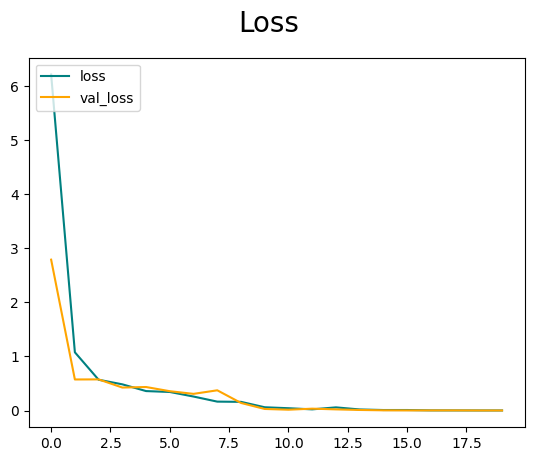

In [32]:
#Plot Performance
fig = plt.figure()
plt.plot (hist.history['loss'], color = 'teal', label = 'loss')
plt.plot (hist.history['val_loss'], color = 'orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

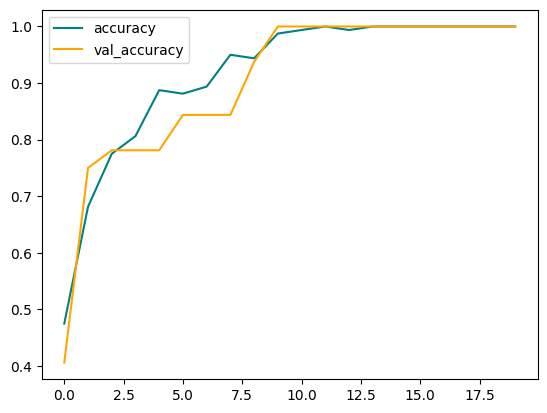

In [33]:
fig2 = plt.figure()
plt.plot (hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot (hist.history['val_accuracy'], color = 'orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [34]:
#Evaluate Performance

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 147ms/step


In [38]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [39]:
 #Test

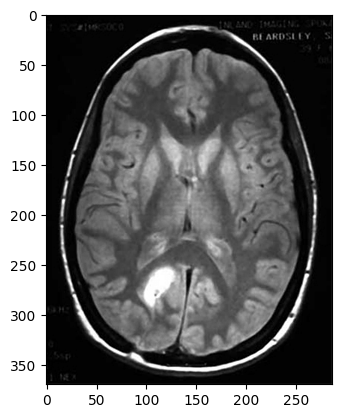

In [40]:
img = cv2.imread('PositiveTest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

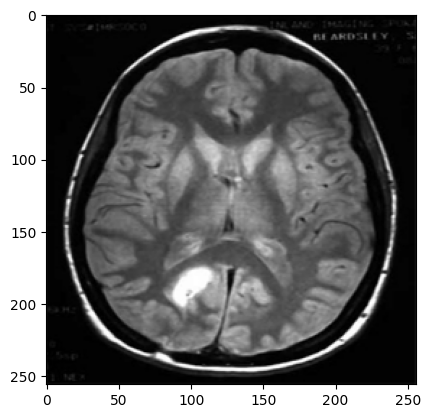

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
resize.shape

TensorShape([256, 256, 3])

In [43]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [44]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 53ms/step


In [45]:
yhat

array([[0.99999684]], dtype=float32)

In [46]:
if yhat > 0.5:
    print(f'Predicted class is positive')
else:
    print(f'Predicted class is negative')

Predicted class is positive


In [ ]:
#SAVE MODEL

In [47]:
from tensorflow.keras.models import load_model

In [48]:
model.save(os.path.join('models', 'MRI Model(2).h5'))

D:\Image Classification\imageclassification\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
import pickle

In [59]:
with open('mri_imageclassifer-0.1.0.pkl', 'wb') as f:
    pickle.dump(model, f)

In [60]:
!zip -r ./mri_imageclassifer-0.1.0.pkl.zip./mri_imageclassifer-0.1.0.pkl

'zip' is not recognized as an internal or external command,
operable program or batch file.


In [49]:
new_model = load_model(os.path.join('models', 'MRI Model(2).h5'))

In [50]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 56ms/step


In [51]:
if yhat_new > 0.5:
    print(f'Predicted class is positive')
else:
    print(f'Predicted class is negative')

Predicted class is positive
